# Exercise 4 Solution
> by GONG ZERUI, 2022.02.17

----

### Preparations


Importing NumPy, Pandas, Matplotlib, and Seaborn.

In [269]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

Importing the training dataset in Jupyter Notebook

In [270]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


----------------

### Problem 1 : Predicting SalePrice using GrLivArea

##### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

Intercept of Regression 	: b =  [27063.1848159]
Coefficients of Regression 	: a =  [[101.18662944]]



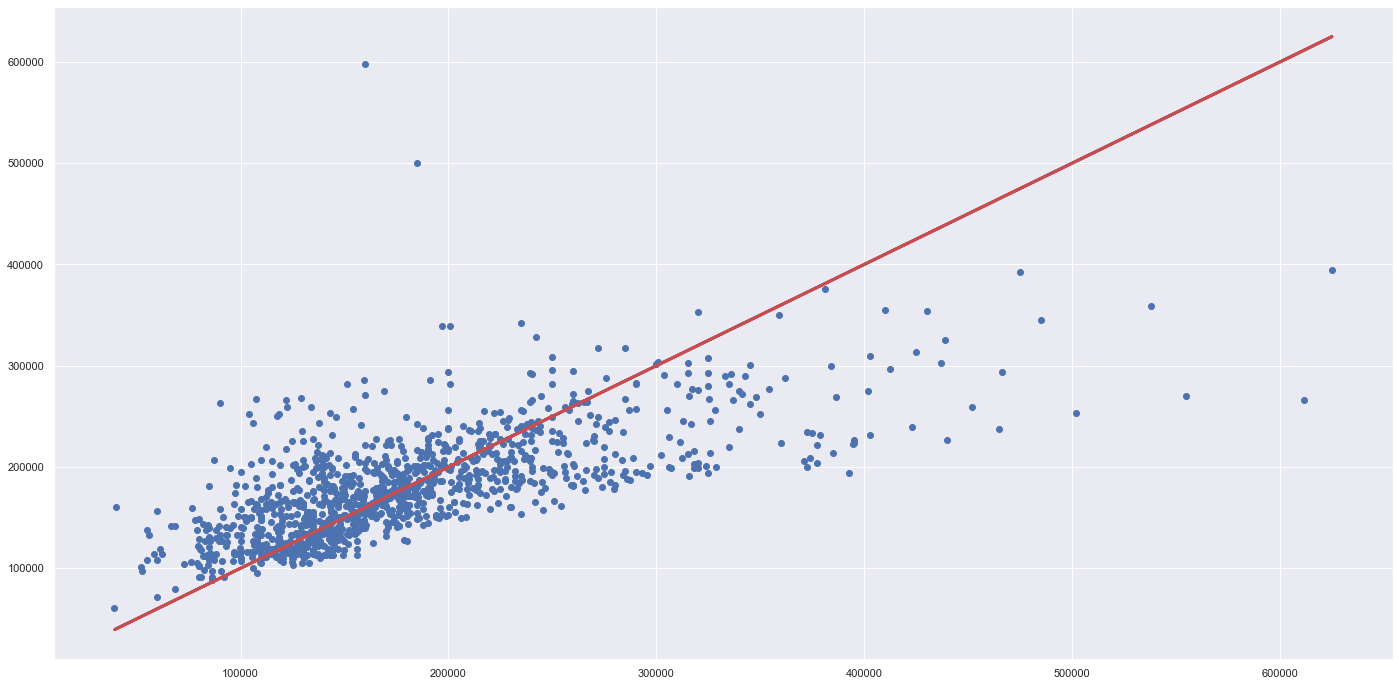

In [271]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import the SalePrice and GrLivArea datasets
SalePrice = pd.DataFrame(trainData['SalePrice']) #response
GrLivArea = pd.DataFrame(trainData['GrLivArea']) #predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(GrLivArea, SalePrice, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict SalePrice values corresponding to GrLivArea
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the regression line
f = plt.figure(figsize=(24, 12))
plt.scatter(y_train, y_train_pred, color = "b")
plt.plot(y_train, y_train, 'r-', linewidth = 3)

##### b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

Metrics selected: Explained Variance

In [272]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.4754750534295459


Test the Linear Regression model using the Test set
Metrics Selected: Mean Squared Error

In [279]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt( mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3753840858.5316253
Root Mean Squared Error (RMSE) 	: 61268.59602220068



------------------------
### Problem 2: Predicting SalePrice using Other Variables

##### Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

Intercept of Regression 	: b =  [66935.20598822]
Coefficients of Regression 	: a =  [[107.86331902]]

Intercept of Regression 	: b =  [70385.61758109]
Coefficients of Regression 	: a =  [[232.05027437]]



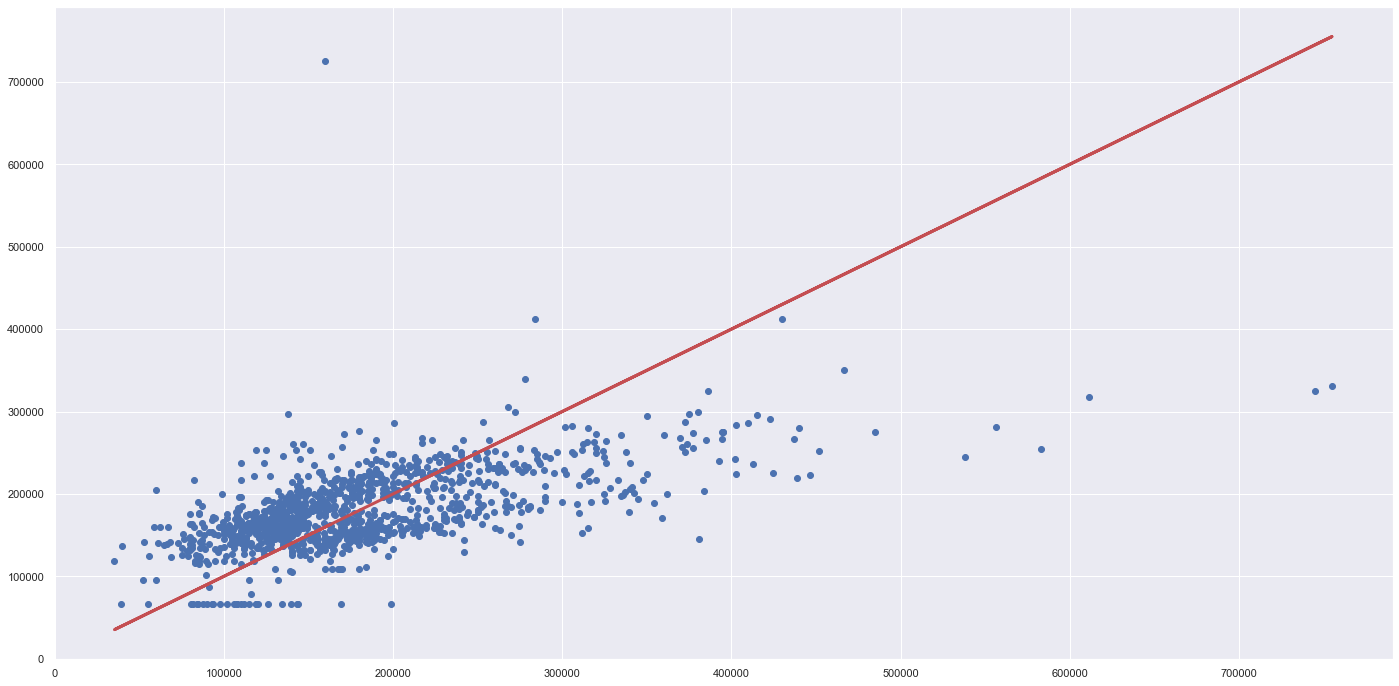

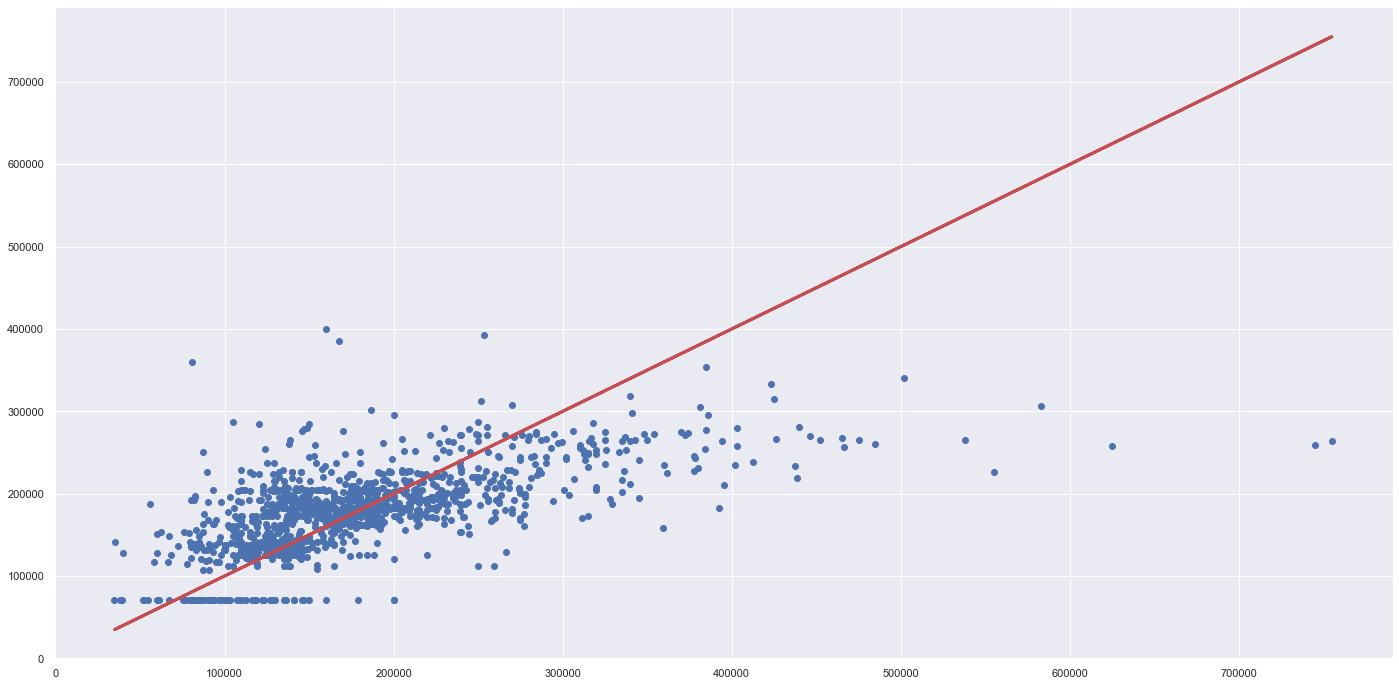

In [274]:
TotalBsmtSF = pd.DataFrame(trainData['TotalBsmtSF'])
GarageArea = pd.DataFrame(trainData['GarageArea'])
# write a function to do regression on some variables.
def regression_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred, color = "b")
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

regression_func(TotalBsmtSF,SalePrice)
regression_func(GarageArea,SalePrice)

In [282]:
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#compare the  three model----------------------------------------------------------------
print("GrLivArea vs. SalePrice")
gof_func(GrLivArea,SalePrice)
print("")
print("TotalBsmtSF vs. SalePrice")
gof_func(TotalBsmtSF,SalePrice)
print("")
print("GaragArea vs. SalePrice")
gof_func(GarageArea,SalePrice)

GrLivArea vs. SalePrice
Mean Squared Error (MSE) 	: 2703929469.128591
Root Mean Squared Error (RMSE) 	: 51999.321814121686

TotalBsmtSF vs. SalePrice
Mean Squared Error (MSE) 	: 5722547955.936468
Root Mean Squared Error (RMSE) 	: 75647.52445345762

GaragArea vs. SalePrice
Mean Squared Error (MSE) 	: 4479038366.972314
Root Mean Squared Error (RMSE) 	: 66925.61816653107


GrLivArea has the lowest Root Mean Square Error value, thus, I conclude among the three models, the model between GrLivArea and SalePrice is the best to predict.

----
### Problem 3 : Refining the Models to Predict SalePrice
##### (a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.



To solve the problem, I wrote a function to remove the outliers from the dataframe.

In [276]:
def FindOutlierBound(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print("Lower:", q1 - 1.5 * iqr)
    print("Upper:", q3 + 1.5 * iqr)


FindOutlierBound(trainData, "SalePrice")
FindOutlierBound(trainData, "GrLivArea")
#! Bit wise comparisons
df_filtered = trainData[(trainData["SalePrice"] <= 340037.5) & (trainData["SalePrice"] >= 3937.5) & (trainData["GrLivArea"] <= 2747.625)& (trainData["GrLivArea"] >= 158.625)]

SalePrice_Cleaned = pd.DataFrame(df_filtered['SalePrice'])
GrLivArea_Cleaned = pd.DataFrame(df_filtered['GrLivArea'])


Lower: 3937.5
Upper: 340037.5
Lower: 158.625
Upper: 2747.625


##### (b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.


I can just reuse the functions I wrote earlier.

Intercept of Regression 	: b =  [34263.76060807]
Coefficients of Regression 	: a =  [[93.26656841]]



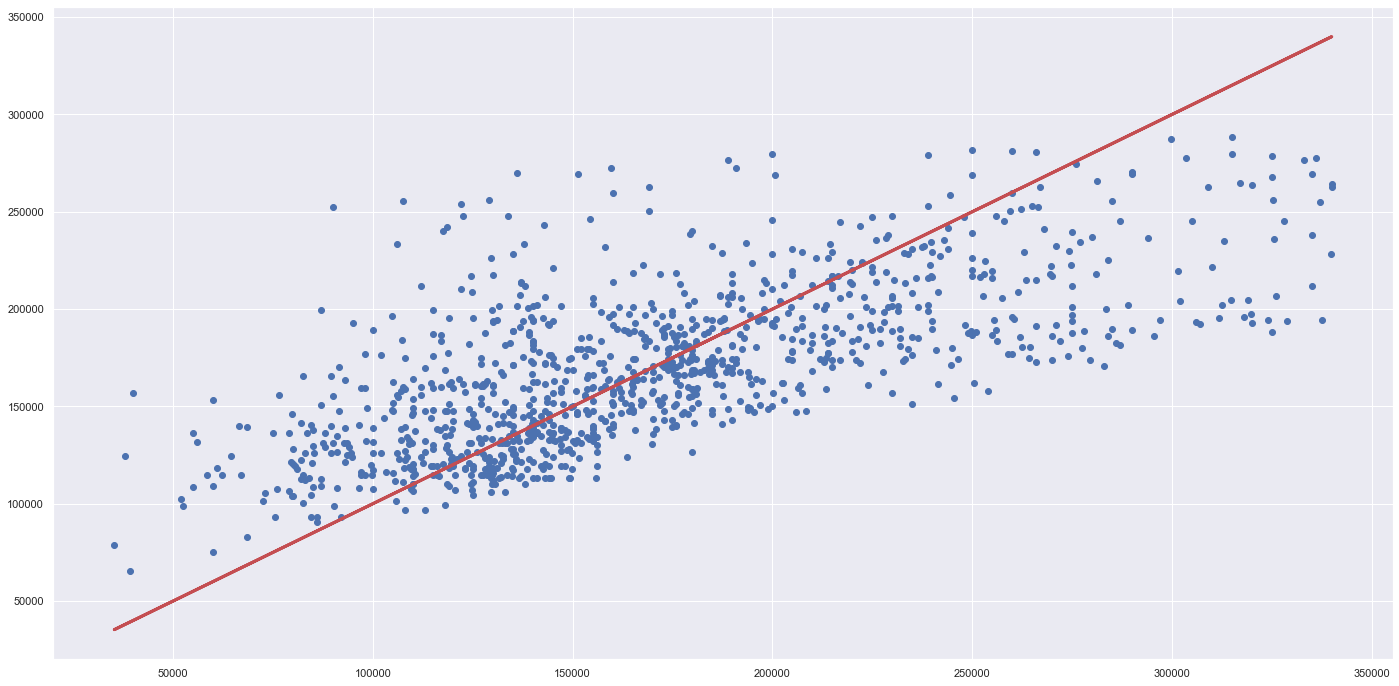

In [285]:
regression_func(GrLivArea_Cleaned, SalePrice_Cleaned)

##### (c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

In [286]:
#Train Set
def gof_func_train(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

print("Train: GrLivArea_Cleaned vs. SalePrice_Cleaned")
gof_func_train(GrLivArea_Cleaned,SalePrice_Cleaned)
print("")
#Test Set
print("Test: GrLivArea_Cleaned vs. SalePrice_Cleaned")
gof_func(GrLivArea_Cleaned,SalePrice_Cleaned)

Train: GrLivArea_Cleaned vs. SalePrice_Cleaned
Explained Variance (R^2) 	: 0.49260916511954556

Test: GrLivArea_Cleaned vs. SalePrice_Cleaned
Mean Squared Error (MSE) 	: 1533487811.5613878
Root Mean Squared Error (RMSE) 	: 39159.77287423138


Comparing to the model obtained in Question 1, the Explained Variance on the train set is somewhat close to the original mode, but the Root Mean Squared Error is significantly lower. Thus, I conclude that the new model is better than the original model in terms of prediction.